# CSE Stock Unusually Volume

## Daily CSE Stock Price Check

### Set Path and link Database

In [3]:
import sys
sys.path.insert(0, '../stock')

import pandas as pd
from tfnstock import RwDatabase
from tfnstock import FormatStockData
# set database
db = '../findata/cse.db'
dbc = RwDatabase(db)

### Check Daily unusually Volume

In [68]:
# Get Company List
sqlflt = "select * from cselist;"
lstCompany = dbc.read_sqldata(sqlflt)
symbol_array = lstCompany['symbol']

# Get stock data from database
data = pd.DataFrame()
formatdata = FormatStockData(db)
for index, row in lstCompany.iterrows():
    madata = formatdata.ma_stockdata(row['symbol']).tail(1)
    madata['company'] = row['company']
    madata['list_date'] = row['list_date']
    data = data.append(madata)

data['v_change'] = data['volume'] - data['v_ma5']
data = data.sort_values(by="v_change", ascending=False)


In [71]:
data[data.change>0].head(10)

,date,open,high,low,close,volume,change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,symbol,company,list_date,v_change
2945,2018-12-17,0.070,0.075,0.070,0.075,1991018,0.005,0.071,0.0705,0.06975,595317.6,447634.8,590214.25,IDK,ThreeD Capital Inc. \n,2016-06-23,1.3957e+06
2924,2018-12-17,0.120,0.120,0.105,0.115,1486080,0.010,0.107,0.1070,0.11075,526839.6,681795.4,1492066.25,NETC,Netcoins Holdings Inc.\n,2018-08-30,959240
2945,2018-12-17,0.095,0.105,0.090,0.105,1156287,0.010,0.099,0.0935,0.08675,767887.4,677275.6,521170.95,FDM,Fandom Sports Media Corp.\n,2016-08-03,388400
2945,2018-12-17,0.065,0.070,0.060,0.070,422755,0.005,0.066,0.0655,0.06975,101914.6,154508.1,249270.60,FAT,Far Resources Ltd.,2011-12-12,320840
293,2018-12-17,0.035,0.040,0.035,0.035,362979,0.005,0.035,0.0340,0.03775,115174.6,505979.8,442623.65,HYPR,HyperBlock Inc.,2018-07-11,247804
2945,2018-12-17,0.070,0.080,0.070,0.070,654715,0.005,0.060,0.0565,0.06125,430741.8,3533625.9,1793231.95,VGO,Vogogo Inc.,2018-01-19,223973
101,2018-12-17,0.640,0.760,0.610,0.750,323943,0.170,0.594,0.5470,0.55750,109954.6,96843.7,104446.75,BIO,Biome Grow Inc.\n,2018-10-09,213988
2945,2018-12-17,0.035,0.040,0.035,0.040,320000,0.005,0.036,0.0355,0.03350,112800.0,61510.0,42855.00,RFR,Renforth Resources Inc.,2009-09-14,207200
626,2018-12-17,0.050,0.090,0.040,0.090,240000,0.030,0.078,0.0840,0.08875,110000.0,55000.0,34000.00,SIG,Sitka Gold Corp.,2018-01-31,130000
2390,2018-12-17,0.060,0.065,0.060,0.060,362200,0.005,0.052,0.0530,0.05175,234920.0,290460.0,267699.10,NUR,Nuran Wireless Inc.,2015-09-22,127280


## Stock Price Visualization

In [81]:
# 从数据库中读取股票数据

stock_symbol = "IDK"
sqlflt_get = "select * from " + stock_symbol + " ;"
sdata = dbc.read_sqldata(sqlflt_get) 
sdata['Date']=pd.to_datetime(sdata['Date'],format='%Y-%m-%d')  #要把日期格式化, 否则matplotlib中无法以日期为索引画X轴
sdata=sdata.set_index(['Date'])
sdata.count()

Open         3942
High         3942
Low          3942
Close        3942
Adj Close    3942
Volume       3942
dtype: int64

### Ploty

In [82]:
import plotly
import plotly.graph_objs as go
pdata = sdata.tail(1200)
plotly.offline.init_notebook_mode(connected=True)

trace = go.Candlestick(x=pdata.index,open = pdata.Open, high=pdata.High, low=pdata.Low, close=pdata.Close)
data=[trace]
plotly.offline.iplot(data)

### Matplotlib绘制K线图

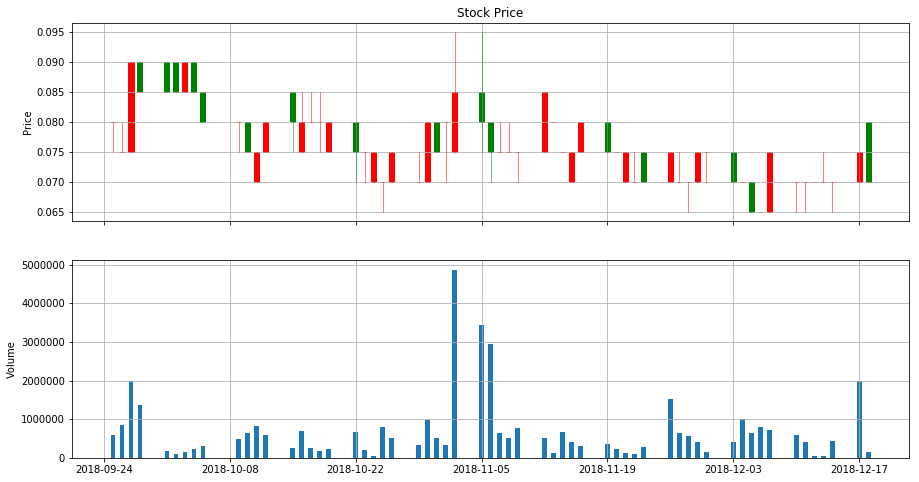

In [83]:
import matplotlib.finance as mpf
__colorup__ = "red"
__colordown__ = "green"

plt_data = sdata.tail(60)
fig, (ax,ax2) = plt.subplots(2, sharex=True, figsize=(15,8))
qutotes=[]
for index, (d,o,c,h,l) in enumerate (zip(plt_data.index,plt_data.Open,plt_data.Close,plt_data.High,plt_data.Low)):
    d = mpf.date2num(d)
    val = (d,o,c,h,l)
    qutotes.append(val)

# k线图和成交量(柱状图)的组合图表

mpf.candlestick_ochl(ax, qutotes, width=0.6, colorup=__colorup__, colordown = __colordown__)
ax.set_title("Stock Price")
ax.grid(True)    
ax.set_ylabel('Price')
ax.autoscale_view()
ax.xaxis_date()

# Volumn
plt.bar(plt_data.index, plt_data.Volume, width= 0.5)
ax2.set_ylabel('Volume')
ax2.grid(True)

In [1]:
import plotly.plotly as py
import numpy as np

data = [dict(
        visible = False,
        line=dict(color='00CED1', width=6),
        name = '𝜈 = '+str(step),
        x = np.arange(0,10,0.01),
        y = np.sin(step*np.arange(0,10,0.01))) for step in np.arange(0,5,0.1)]
data[10]['visible'] = True

steps = []
for i in range(len(data)):
    step = dict(
        method = 'restyle',
        args = ['visible', [False] * len(data)],
    )
    step['args'][1][i] = True # Toggle i'th trace to "visible"
    steps.append(step)

sliders = [dict(
    active = 10,
    currentvalue = {"prefix": "Frequency: "},
    pad = {"t": 50},
    steps = steps
)]

layout = dict(sliders=sliders)
fig = dict(data=data, layout=layout)

py.iplot(fig, filename='Sine Wave Slider')

ValueError: 
    Invalid value of type 'builtins.str' received for the 'color' property of scatter.line
        Received value: '00CED1'

    The 'color' property is a color and may be specified as:
      - A hex string (e.g. '#ff0000')
      - An rgb/rgba string (e.g. 'rgb(255,0,0)')
      - An hsl/hsla string (e.g. 'hsl(0,100%,50%)')
      - An hsv/hsva string (e.g. 'hsv(0,100%,100%)')
      - A named CSS color:
            aliceblue, antiquewhite, aqua, aquamarine, azure,
            beige, bisque, black, blanchedalmond, blue,
            blueviolet, brown, burlywood, cadetblue,
            chartreuse, chocolate, coral, cornflowerblue,
            cornsilk, crimson, cyan, darkblue, darkcyan,
            darkgoldenrod, darkgray, darkgrey, darkgreen,
            darkkhaki, darkmagenta, darkolivegreen, darkorange,
            darkorchid, darkred, darksalmon, darkseagreen,
            darkslateblue, darkslategray, darkslategrey,
            darkturquoise, darkviolet, deeppink, deepskyblue,
            dimgray, dimgrey, dodgerblue, firebrick,
            floralwhite, forestgreen, fuchsia, gainsboro,
            ghostwhite, gold, goldenrod, gray, grey, green,
            greenyellow, honeydew, hotpink, indianred, indigo,
            ivory, khaki, lavender, lavenderblush, lawngreen,
            lemonchiffon, lightblue, lightcoral, lightcyan,
            lightgoldenrodyellow, lightgray, lightgrey,
            lightgreen, lightpink, lightsalmon, lightseagreen,
            lightskyblue, lightslategray, lightslategrey,
            lightsteelblue, lightyellow, lime, limegreen,
            linen, magenta, maroon, mediumaquamarine,
            mediumblue, mediumorchid, mediumpurple,
            mediumseagreen, mediumslateblue, mediumspringgreen,
            mediumturquoise, mediumvioletred, midnightblue,
            mintcream, mistyrose, moccasin, navajowhite, navy,
            oldlace, olive, olivedrab, orange, orangered,
            orchid, palegoldenrod, palegreen, paleturquoise,
            palevioletred, papayawhip, peachpuff, peru, pink,
            plum, powderblue, purple, red, rosybrown,
            royalblue, saddlebrown, salmon, sandybrown,
            seagreen, seashell, sienna, silver, skyblue,
            slateblue, slategray, slategrey, snow, springgreen,
            steelblue, tan, teal, thistle, tomato, turquoise,
            violet, wheat, white, whitesmoke, yellow,
            yellowgreen